# Time Series Aggregation

In this example, we are going to explore different ways to cluster the temporal resolution of PyPSA models, and what impact they have on the optimisation results and solving times. Using an hourly resolved variant of the [single-node capacity expansion example](), we will compare three different approaches to reduce the number of time steps in the model:

- **Sampling**: Selecting a subset of the given snapshots based on a given frequency,
- **Averaging**: Aggregating the snapshots by averaging them over a given frequency, and
- **Segmentation**: Clustering the snapshots into segments of a given frequency and using [`tsam`](https://tsam.readthedocs.io/en/latest/) library.

We start with the usual imports and loading the hourly resolved model.

In [ ]:
import pypsa
import pandas as pd
import time
import logging
import numpy as np
import tsam.timeseriesaggregation as tsam

logging.getLogger().setLevel(logging.WARNING)

SOLVER = "gurobi"  # or "highs"

template_n = pypsa.Network(
    "https://tubcloud.tu-berlin.de/s/8Cznnzaf5LQz4o8/download/model-energy-hourly.nc"
)

INFO:pypsa.network.io:Retrieving network data from https://tubcloud.tu-berlin.de/s/8Cznnzaf5LQz4o8/download/model-energy-hourly.nc.
INFO:pypsa.network.io:New version 0.35.1 available! (Current: 0.35.0)
INFO:pypsa.network.io:Imported network 'Unnamed Network' has buses, carriers, generators, links, loads, storage_units, stores


Since we also want to monitor the solving times, we will use a small utility function that wraps around the solving process and returns the seconds it took to solve the model:

In [ ]:
def time_it(func, *args, **kwargs):
    """Time the execution of a function and return the elapsed time in seconds."""
    start_time = time.time()
    result = func(*args, **kwargs)
    elapsed_time = time.time() - start_time
    return result, elapsed_time


logging.getLogger().setLevel(logging.WARNING)

## Hourly Baseline

Additionally, we need a baseline model to compare aggregated models against. We will use the hourly resolved model for this.

In [3]:
n_hourly = template_n.copy()

_, s_hourly = time_it(n_hourly.optimize, solver_name=SOLVER, log_to_console=False)
s_hourly


Writing continuous variables.: 100%|██████████| 11/11 [00:00<00:00, 119.00it/s]

Set parameter TokenServer to value "gurobi-license.pypsa.org"


Read LP format model from file /tmp/linopy-problem-u_ipu6v4.lp
Reading time = 0.15 seconds
obj: 192726 rows, 87606 columns, 372396 nonzeros
Set parameter LogToConsole to value 0


16.163925647735596

## Sampling

We will start with the sampling approach, which is the simplest one. We simply select every $N$-th snapshot from the model. The important part here is that we need to adjust the snapshot weightings accordingly, as each remaining snapshot now represents $N$ hours. We iterate over N from 2 to 11, i.e. from 2-hourly to 11-hourly resolved models.

In [4]:
sampling_n = {1: n_hourly}
sampling_s = {1: s_hourly}

for resolution in range(2, 12):
    n = template_n.copy()

    # set the sampled snapshots (time series are automatically reduced)
    n.set_snapshots(n.snapshots[::resolution])
    n.snapshot_weightings.loc[:, :] = resolution

    _, s = time_it(n.optimize, solver_name=SOLVER, log_to_console=False)

    sampling_n[resolution] = n
    sampling_s[resolution] = s

Writing continuous variables.: 100%|██████████| 11/11 [00:00<00:00, 171.09it/s]

Set parameter TokenServer to value "gurobi-license.pypsa.org"
Read LP format model from file /tmp/linopy-problem-zq9bgetj.lp
Reading time = 0.07 seconds
obj: 96366 rows, 43806 columns, 186198 nonzeros
Set parameter LogToConsole to value 0



Writing continuous variables.: 100%|██████████| 11/11 [00:00<00:00, 296.75it/s]

Set parameter TokenServer to value "gurobi-license.pypsa.org"
Read LP format model from file /tmp/linopy-problem-absciimi.lp


Reading time = 0.05 seconds
obj: 64246 rows, 29206 columns, 124144 nonzeros
Set parameter LogToConsole to value 0


Writing continuous variables.: 100%|██████████| 11/11 [00:00<00:00, 316.15it/s]

Set parameter TokenServer to value "gurobi-license.pypsa.org"
Read LP format model from file /tmp/linopy-problem-20tqcgep.lp


Reading time = 0.03 seconds
obj: 48186 rows, 21906 columns, 93110 nonzeros
Set parameter LogToConsole to value 0


Writing continuous variables.: 100%|██████████| 11/11 [00:00<00:00, 421.66it/s]

Set parameter TokenServer to value "gurobi-license.pypsa.org"
Read LP format model from file /tmp/linopy-problem-a9kx0cpb.lp
Reading time = 0.03 seconds
obj: 38550 rows, 17526 columns, 74479 nonzeros
Set parameter LogToConsole to value 0



Writing continuous variables.: 100%|██████████| 11/11 [00:00<00:00, 430.30it/s]

Set parameter TokenServer to value "gurobi-license.pypsa.org"
Read LP format model from file /tmp/linopy-problem-818zpjs8.lp


Reading time = 0.02 seconds
obj: 32126 rows, 14606 columns, 62068 nonzeros
Set parameter LogToConsole to value 0


Writing continuous variables.: 100%|██████████| 11/11 [00:00<00:00, 472.93it/s]

Set parameter TokenServer to value "gurobi-license.pypsa.org"


Read LP format model from file /tmp/linopy-problem-j6fieo0t.lp
Reading time = 0.02 seconds
obj: 27550 rows, 12526 columns, 53225 nonzeros
Set parameter LogToConsole to value 0


Writing continuous variables.: 100%|██████████| 11/11 [00:00<00:00, 465.10it/s]

Set parameter TokenServer to value "gurobi-license.pypsa.org"


Read LP format model from file /tmp/linopy-problem-iy9o56nn.lp
Reading time = 0.02 seconds
obj: 24096 rows, 10956 columns, 46588 nonzeros
Set parameter LogToConsole to value 0
Set parameter TokenServer to value "gurobi-license.pypsa.org"
Read LP format model from file /tmp/linopy-problem-o6fird7l.lp
Reading time = 0.02 seconds
obj: 21434 rows, 9746 columns, 41420 nonzeros
Set parameter LogToConsole to value 0
Set parameter TokenServer to value "gurobi-license.pypsa.org"
Read LP format model from file /tmp/linopy-problem-wnyyl3hk.lp
Reading time = 0.02 seconds
obj: 19278 rows, 8766 columns, 37242 nonzeros
Set parameter LogToConsole to value 0
Set parameter TokenServer to value "gurobi-license.pypsa.org"
Read LP format model from file /tmp/linopy-problem-5fcuuzh4.lp
Reading time = 0.02 seconds
obj: 17540 rows, 7976 columns, 33888 nonzeros
Set parameter LogToConsole to value 0


## Averaging

The averaging approach also has equal snapshot durations, but instead of selecting data from every $N$-th snapshots, we average time series data for every $N$ snapshots. This means that the resulting model has $N$ times fewer snapshots, but each snapshot represents the average of $N$ original snapshots. Again, we need to adjust the snapshot weightings accordingly.

In [5]:
averaging_n = {1: n_hourly}
averaging_s = {1: s_hourly}

for resolution in range(2, 12):
    n = template_n.copy()

    # resample the time series data by averaging
    n.loads_t.p_set = n.loads_t.p_set.resample(f"{resolution}h").mean()
    n.generators_t.p_max_pu = n.generators_t.p_max_pu.resample(f"{resolution}h").mean()

    # set the new snapshtos and adjusted snapshot weightings
    n.set_snapshots(n.snapshots[::resolution])
    n.snapshot_weightings.loc[:, :] = resolution

    _, s = time_it(n.optimize, solver_name=SOLVER, log_to_console=False)

    averaging_n[resolution] = n
    averaging_s[resolution] = s

Writing continuous variables.: 100%|██████████| 11/11 [00:00<00:00, 194.26it/s]

Set parameter TokenServer to value "gurobi-license.pypsa.org"
Read LP format model from file /tmp/linopy-problem-iogqv45m.lp
Reading time = 0.07 seconds
obj: 96366 rows, 43806 columns, 186415 nonzeros
Set parameter LogToConsole to value 0



Writing continuous variables.: 100%|██████████| 11/11 [00:00<00:00, 288.05it/s]

Set parameter TokenServer to value "gurobi-license.pypsa.org"
Read LP format model from file /tmp/linopy-problem-d_hmuits.lp


Reading time = 0.05 seconds
obj: 64246 rows, 29206 columns, 124352 nonzeros
Set parameter LogToConsole to value 0


Writing continuous variables.: 100%|██████████| 11/11 [00:00<00:00, 351.53it/s]

Set parameter TokenServer to value "gurobi-license.pypsa.org"


Read LP format model from file /tmp/linopy-problem-l1hgrqfx.lp
Reading time = 0.03 seconds
obj: 48186 rows, 21906 columns, 93397 nonzeros
Set parameter LogToConsole to value 0


Writing continuous variables.: 100%|██████████| 11/11 [00:00<00:00, 372.92it/s]


Set parameter TokenServer to value "gurobi-license.pypsa.org"
Read LP format model from file /tmp/linopy-problem-i8n_qbdo.lp
Reading time = 0.03 seconds
obj: 38550 rows, 17526 columns, 74771 nonzeros
Set parameter LogToConsole to value 0


Writing continuous variables.: 100%|██████████| 11/11 [00:00<00:00, 484.16it/s]

Set parameter TokenServer to value "gurobi-license.pypsa.org"


Read LP format model from file /tmp/linopy-problem-_2flj7ub.lp
Reading time = 0.02 seconds
obj: 32126 rows, 14606 columns, 62364 nonzeros
Set parameter LogToConsole to value 0


Writing continuous variables.: 100%|██████████| 11/11 [00:00<00:00, 503.03it/s]

Set parameter TokenServer to value "gurobi-license.pypsa.org"
Read LP format model from file /tmp/linopy-problem-zi7d_0tx.lp


Reading time = 0.02 seconds
obj: 27550 rows, 12526 columns, 53538 nonzeros
Set parameter LogToConsole to value 0


Writing continuous variables.: 100%|██████████| 11/11 [00:00<00:00, 553.73it/s]

Set parameter TokenServer to value "gurobi-license.pypsa.org"
Read LP format model from file /tmp/linopy-problem-1j0p71rh.lp


Reading time = 0.02 seconds
obj: 24096 rows, 10956 columns, 46953 nonzeros
Set parameter LogToConsole to value 0
Set parameter TokenServer to value "gurobi-license.pypsa.org"
Read LP format model from file /tmp/linopy-problem-fmq2rnlg.lp
Reading time = 0.02 seconds
obj: 21434 rows, 9746 columns, 41730 nonzeros
Set parameter LogToConsole to value 0
Set parameter TokenServer to value "gurobi-license.pypsa.org"
Read LP format model from file /tmp/linopy-problem-ogtkj8uz.lp
Reading time = 0.01 seconds
obj: 19278 rows, 8766 columns, 37563 nonzeros
Set parameter LogToConsole to value 0
Set parameter TokenServer to value "gurobi-license.pypsa.org"
Read LP format model from file /tmp/linopy-problem-jz0znxj7.lp
Reading time = 0.01 seconds
obj: 17540 rows, 7976 columns, 34205 nonzeros
Set parameter LogToConsole to value 0


## Segmentation

The segmentation approach is more complex. It uses a separate library called [`tsam`](https://tsam.readthedocs.io/en/latest/) to cluster the snapshots into segments of varying lengths. The sequence of snapshots is preserved as segments are only formed from neighbouring snapshots based on their similarity. For measuring similarity, it is advisable to normalise the time series data. This approach promises to capture the temporal patterns more effectively, as it can opt for higher resolution during periods of high variability and lower resolution during periods with low variability. The snapshot weightings are adjusted based on the number of snapshots in each segment.

In [6]:
segmentation_n = {1: n_hourly}
segmentation_s = {1: s_hourly}

for resolution in range(2, 12):
    n = template_n.copy()

    # calculate number of segments equivalent to resolution
    segments = int(8760 / resolution)

    # concatenate and normalize all time series with min-max normalization
    df = pd.concat([n.generators_t.p_max_pu, n.loads_t.p_set], axis=1)
    df_norm = (df - df.min()) / (df.max() - df.min())

    # use `tsam` to run segmentation clustering algorithm
    agg = tsam.TimeSeriesAggregation(
        df_norm,
        hoursPerPeriod=len(df_norm),
        noTypicalPeriods=1,
        noSegments=segments,
        segmentation=True,
        solver=SOLVER,
    )
    agg = agg.createTypicalPeriods()

    # translate segments into time stamps and calculate new weightings
    weightings = agg.index.get_level_values("Segment Duration")
    offsets = np.insert(np.cumsum(weightings[:-1]), 0, 0)
    weightings = n.snapshot_weightings.loc[n.snapshots[offsets]].mul(weightings, axis=0)

    # aggregate the hourly time series by averaging over the segments
    mapping = (
        pd.Series(weightings.index, index=weightings.index).reindex(n.snapshots).ffill()
    )
    n.generators_t.p_max_pu = n.generators_t.p_max_pu.groupby(mapping).mean()
    n.loads_t.p_set = n.loads_t.p_set.groupby(mapping).mean()

    # set new segmented snapshots and adjust weightings
    n.set_snapshots(weightings.index)
    n.snapshot_weightings = weightings

    # run optimization
    _, s = time_it(n.optimize, solver_name=SOLVER, log_to_console=False)

    segmentation_n[resolution] = n
    segmentation_s[resolution] = s

Writing continuous variables.: 100%|██████████| 11/11 [00:00<00:00, 209.28it/s]

Set parameter TokenServer to value "gurobi-license.pypsa.org"


Read LP format model from file /tmp/linopy-problem-b7wcqb1_.lp
Reading time = 0.07 seconds
obj: 96366 rows, 43806 columns, 187272 nonzeros
Set parameter LogToConsole to value 0


Writing continuous variables.: 100%|██████████| 11/11 [00:00<00:00, 299.36it/s]

Set parameter TokenServer to value "gurobi-license.pypsa.org"


Read LP format model from file /tmp/linopy-problem-f2ooicrt.lp
Reading time = 0.04 seconds
obj: 64246 rows, 29206 columns, 125094 nonzeros
Set parameter LogToConsole to value 0


Writing continuous variables.: 100%|██████████| 11/11 [00:00<00:00, 277.97it/s]

Set parameter TokenServer to value "gurobi-license.pypsa.org"
Read LP format model from file /tmp/linopy-problem-1sut6q1p.lp


Reading time = 0.03 seconds
obj: 48186 rows, 21906 columns, 93920 nonzeros
Set parameter LogToConsole to value 0


Writing continuous variables.: 100%|██████████| 11/11 [00:00<00:00, 399.50it/s]

Set parameter TokenServer to value "gurobi-license.pypsa.org"
Read LP format model from file /tmp/linopy-problem-8f2a1ydp.lp
Reading time = 0.03 seconds
obj: 38550 rows, 17526 columns, 75193 nonzeros
Set parameter LogToConsole to value 0



Writing continuous variables.: 100%|██████████| 11/11 [00:00<00:00, 465.57it/s]

Set parameter TokenServer to value "gurobi-license.pypsa.org"
Read LP format model from file /tmp/linopy-problem-1wobvj0s.lp


Reading time = 0.02 seconds
obj: 32126 rows, 14606 columns, 62672 nonzeros
Set parameter LogToConsole to value 0


Writing continuous variables.: 100%|██████████| 11/11 [00:00<00:00, 509.79it/s]

Set parameter TokenServer to value "gurobi-license.pypsa.org"


Read LP format model from file /tmp/linopy-problem-wfrmmdor.lp
Reading time = 0.02 seconds
obj: 27528 rows, 12516 columns, 53707 nonzeros
Set parameter LogToConsole to value 0


Writing continuous variables.: 100%|██████████| 11/11 [00:00<00:00, 530.71it/s]

Set parameter TokenServer to value "gurobi-license.pypsa.org"
Read LP format model from file /tmp/linopy-problem-miikvbmv.lp


Reading time = 0.02 seconds
obj: 24096 rows, 10956 columns, 47017 nonzeros
Set parameter LogToConsole to value 0
Set parameter TokenServer to value "gurobi-license.pypsa.org"
Read LP format model from file /tmp/linopy-problem-ytbxjdmv.lp
Reading time = 0.02 seconds
obj: 21412 rows, 9736 columns, 41782 nonzeros
Set parameter LogToConsole to value 0
Set parameter TokenServer to value "gurobi-license.pypsa.org"
Read LP format model from file /tmp/linopy-problem-n6hsffz9.lp
Reading time = 0.01 seconds
obj: 19278 rows, 8766 columns, 37625 nonzeros
Set parameter LogToConsole to value 0
Set parameter TokenServer to value "gurobi-license.pypsa.org"
Read LP format model from file /tmp/linopy-problem-duoyv2z7.lp
Reading time = 0.01 seconds
obj: 17518 rows, 7966 columns, 34194 nonzeros
Set parameter LogToConsole to value 0


Now before we go ahead with the evaluation of the different approaches, let's quickly glance at the distribution of snapshot durations obtained from the segmentation approach for a resolution equivalent to a 3-hourly model. We can see quite some variability in the segment length.

<Axes: xlabel='snapshot duration [h]', ylabel='snapshots [number]'>

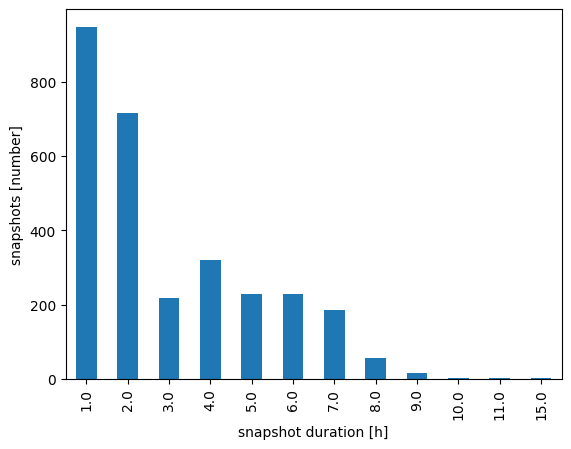

In [7]:
segmentation_n[3].snapshot_weightings.generators.value_counts().sort_index(
    ascending=True
).plot.bar(ylabel="snapshots [number]", xlabel="snapshot duration [h]")

## Evaluation

Let's start our evaluation with a look at the solving times. We can see that across all approaches, the solving times quickly decay, especially as we go from hourly to 2-hourly resolved models and decrease less substantially afterwards.

<Axes: xlabel='resolution [h]', ylabel='time [s]'>

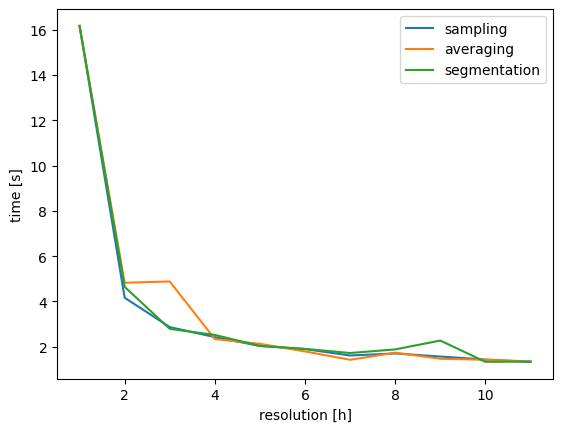

In [8]:
pd.Series(sampling_s).plot(label="sampling", legend=True)
pd.Series(averaging_s).plot(label="averaging", legend=True)
pd.Series(segmentation_s).plot(
    label="segmentation", ylabel="time [s]", xlabel="resolution [h]", legend=True
)

Furthermore, we compare the relative error in total system costs compared to the hourly resolved model. We can see how the segmentation approach remains more stable than the other two approaches, especially for lower resolutions. Even with 11-hourly equivalent resolution, the segmentation approach only has a relative error of -1% compared to the hourly resolved model (i.e. it appears to be 1% cheaper). Similar patterns can be observed for the relative error in the total installed capacity of solar and batteries, two technologies that are particularly sensitive to the temporal resolution of the model.

<Axes: xlabel='resolution [h]', ylabel='relative objective error [%]'>

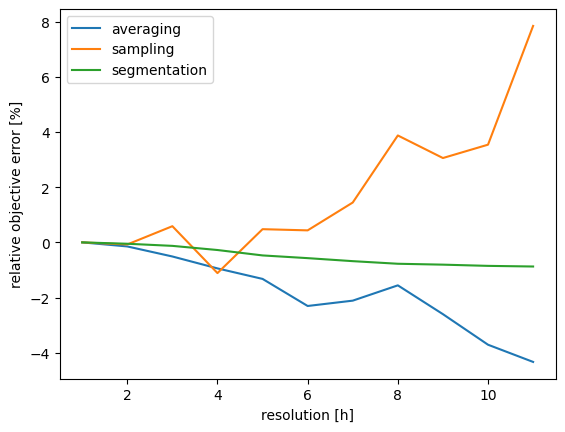

In [9]:
def tsc(n):
    return (n.statistics.capex().sum() + n.statistics.opex().sum()) / 1e9


pd.concat(
    [
        pd.Series({("sampling", res): tsc(n) for res, n in sampling_n.items()}),
        pd.Series({("averaging", res): tsc(n) for res, n in averaging_n.items()}),
        pd.Series({("segmentation", res): tsc(n) for res, n in segmentation_n.items()}),
    ]
).unstack(0).div(tsc(n_hourly)).sub(1).mul(100).plot(
    ylabel="relative objective error [%]", xlabel="resolution [h]", legend=True
)

<Axes: xlabel='resolution [h]', ylabel='relative solar capacity error [%]'>

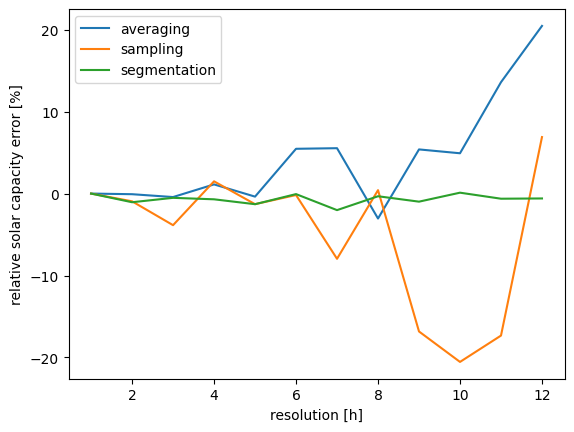

In [ ]:
def solar(n):
    return n.generators.loc["solar", "p_nom_opt"]


pd.concat(
    [
        pd.Series({("sampling", res): solar(n) for res, n in sampling_n.items()}),
        pd.Series({("averaging", res): solar(n) for res, n in averaging_n.items()}),
        pd.Series(
            {("segmentation", res): solar(n) for res, n in segmentation_n.items()}
        ),
    ]
).unstack(0).div(solar(n_hourly)).sub(1).mul(100).plot(
    ylabel="relative solar capacity error [%]", xlabel="resolution [h]", legend=True
)

<Axes: xlabel='resolution [h]', ylabel='relative battery capacity error [%]'>

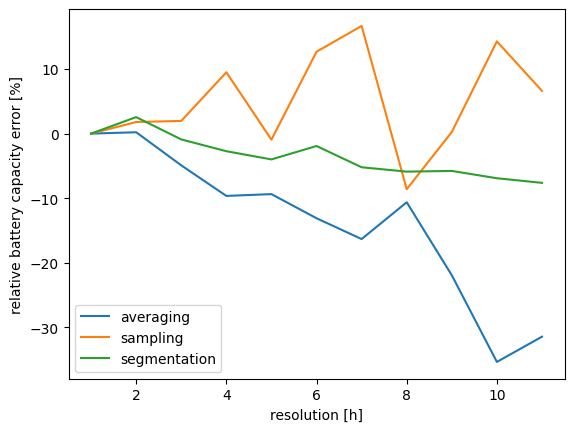

In [ ]:
def battery(n):
    return n.storage_units.loc["battery storage", "p_nom_opt"]


pd.concat(
    [
        pd.Series({("sampling", res): battery(n) for res, n in sampling_n.items()}),
        pd.Series({("averaging", res): battery(n) for res, n in averaging_n.items()}),
        pd.Series(
            {("segmentation", res): battery(n) for res, n in segmentation_n.items()}
        ),
    ]
).unstack(0).div(battery(n_hourly)).sub(1).mul(100).plot(
    ylabel="relative battery capacity error [%]", xlabel="resolution [h]", legend=True
)